In [2]:
from pathlib import Path
import h5py
import numpy as np
import fastmri
from matplotlib import pyplot as plt
from fastmri.data import transforms as T
from fastmri.data.subsample import RandomMaskFunc
import os

Visualize PDW knees with and without Fat Supression

In [3]:
download_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Knee'
train_path = os.path.join(download_path,'multicoil_train')
validation_path = os.path.join(download_path,'multicoil_val')
test_path = os.path.join(download_path,'multicoil_test')
# fully_sampled_test_path = os.path.join(download_path,'multicoil_test_full') # KNEE DOES NOT HAVE THIS!


In [4]:
# Select PD and PDFS file => attrs['acquisition'] = 'CORPD_FBK' and 'CORPDFS_FBK'
train_list = list(Path(train_path).glob('*.h5')) 

PD_hf = None
PDFS_hf = None

# search for example of PDFS and PD file
for file in train_list:
    hf_loop = h5py.File(file, 'r')
    acquisition = hf_loop.attrs['acquisition']
    if acquisition == 'CORPDFS_FBK':
        PDFS_hf = hf_loop
        print(hf_loop)
        print(dict(hf_loop.attrs))
        if PD_hf is not None:
            break
    if acquisition == 'CORPD_FBK':
        PD_hf = hf_loop
        print(hf_loop)
        print(dict(hf_loop.attrs))
        if PDFS_hf is not None:
            break

print(PD_hf.keys()) 

<HDF5 file "file1000059.h5" (mode r)>
{'acquisition': 'CORPDFS_FBK', 'max': 0.00020937306300046577, 'norm': 0.061983517696854167, 'patient_id': '1b6c0b0238b40603a6d0d0fd0d27c2d9e2a3dc89dd0de99f47b9b1ea1c537af6'}
<HDF5 file "file1002000.h5" (mode r)>
{'acquisition': 'CORPD_FBK', 'max': 0.0006628164083026143, 'norm': 0.21518276825671565, 'patient_id': '21b1c9bea3826a5e902054631d96982299418691427dce2cace5a8e2a0fb47e2'}
<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>


Plot via keys() - 'reconstruction_rss'

(46, 320, 320)
(38, 320, 320)


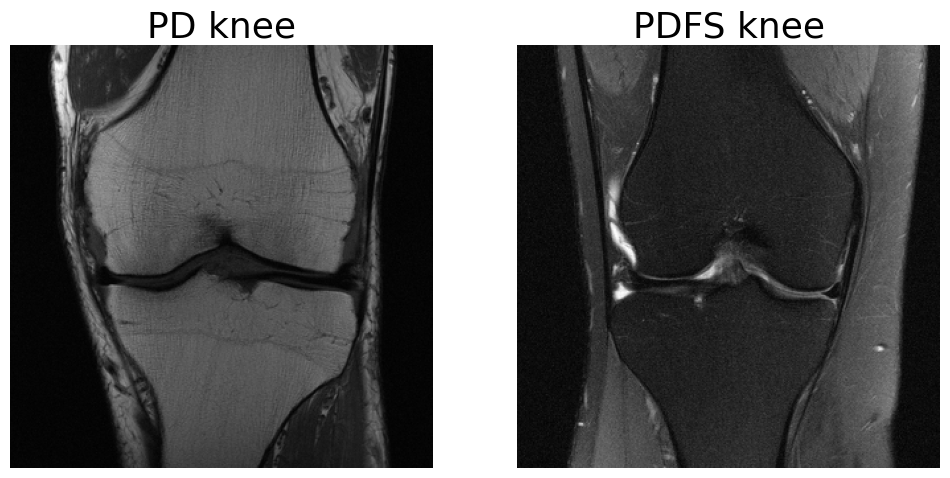

In [5]:
# check the shape of the data
print(PD_hf['reconstruction_rss'].shape) # (46, 320, 320)
print(PDFS_hf['reconstruction_rss'].shape) # (38, 320, 320)
slice = 20

# Increase the font size of the titles
plt.rcParams['axes.titlesize'] = 26

# plot PDW knee and PDFS knee side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


# plot PDW knee
axs[0].imshow(np.flipud(PD_hf['reconstruction_rss'][slice]), cmap='gray')
axs[0].set_title('PD knee')
axs[0].axis('off')

# plot PDFS knee
axs[1].imshow(np.flipud(PDFS_hf['reconstruction_rss'][slice]), cmap='gray')
axs[1].set_title('PDFS knee')
axs[1].axis('off')

plt.savefig('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/figures/PD_PDFS_knee.png') #make sure this is BEFORE plt.show()
plt.show()


FOR TESTING DATA: keys = header, subsampled_kspace, mask   !!
=> Meaning no GT images of the full reconstruction can be made!

In [6]:
# Select PD and PDFS file => attrs['acquisition'] = 'CORPD_FBK' and 'CORPDFS_FBK'
test_list = list(Path(test_path).glob('*.h5')) 

PD_hf_test = None
PDFS_hf_test = None

# search for example of PDFS and PD file
for file in test_list:
    hf_loop = h5py.File(file, 'r')
    acquisition = hf_loop.attrs['acquisition']
    if acquisition == 'CORPDFS_FBK':
        PDFS_hf_test = hf_loop
        print(hf_loop)
        print(dict(hf_loop.attrs))
        if PD_hf_test is not None:
            break
    if acquisition == 'CORPD_FBK':
        PD_hf_test = hf_loop
        print(hf_loop)
        print(dict(hf_loop.attrs))
        if PDFS_hf_test is not None:
            break


print(PD_hf.keys())

<HDF5 file "file1001796.h5" (mode r)>
{'acceleration': 8, 'acquisition': 'CORPD_FBK', 'num_low_frequency': 15, 'patient_id': '74a218268e94564bf6d1ab18026e9f7d1a916d9abb863a41980d880e39f42a25'}
<HDF5 file "file1001532.h5" (mode r)>
{'acceleration': 8, 'acquisition': 'CORPDFS_FBK', 'num_low_frequency': 15, 'patient_id': 'c718136763acc132b786a0f1915745d1b48c38a1e0f52fedf5dc4b7770061c67'}
<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>


(30, 15, 640, 372)


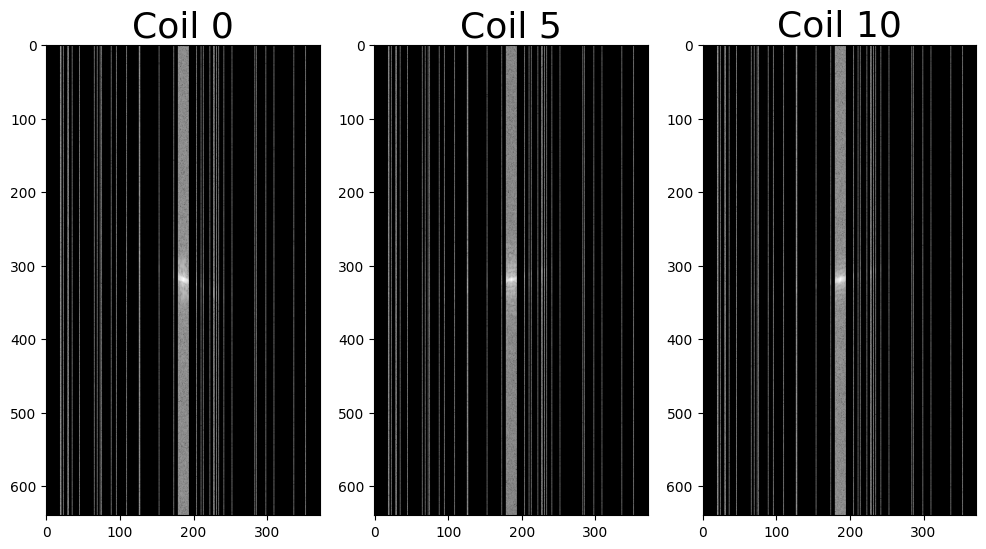

In [7]:
# show image of kspace
volume_kspace = PD_hf_test['kspace'][()]
print(volume_kspace.shape) # 30 slices, 15 coils, 640x372

slice_kspace = volume_kspace[20]  

def show_coils(data, coil_nums, cmap=None):
    fig = plt.figure(figsize=(12,8))
    for i, num in enumerate(coil_nums):
        plt.subplot(1, len(coil_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)
        plt.title(f"Coil {num}")

show_coils(np.log(np.abs(slice_kspace) + 1e-9), [0, 5, 10], cmap='gray')